In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('data/stud.csv')

In [42]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [43]:
df.shape

(1000, 8)

# Data Chekc to perfom




- Find Missing Values
- Check Duplicates
- Check Datatype
- Check the number of unique values from each column
- Check statistics of dataset
- Check various categories present

In [44]:
#check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [45]:
#check dupliacte values
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [48]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

### Exploring data

In [49]:
print('categories in gender variable:', end=" ")
print(df['gender'].unique())

print('categories in race/ethinicity variable:', end=" ")
print(df['race_ethnicity'].unique())

print('categories in lunch variable:', end=" ")
print(df['lunch'].unique())


print('categories in test_prep_course variable:', end=" ")
print(df['test_preparation_course'].unique())


categories in gender variable: ['female' 'male']
categories in race/ethinicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in lunch variable: ['standard' 'free/reduced']
categories in test_prep_course variable: ['none' 'completed']


In [50]:
#define numerical and categorical columns

numerical_column=[feature for feature in df.columns if df[feature].dtype!='O']


categorical_column=[feature for feature in df.columns if df[feature].dtype=='O']

In [51]:
print(numerical_column)
print(categorical_column)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [52]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

#Add column for total score

In [53]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

In [54]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'number of student with full marks in maths:{math_full}')
print(f'number of student with full marks in writing:{writing_full}')
print(f'number of student with full marks in reading:{reading_full}')

number of student with full marks in maths:7
number of student with full marks in writing:14
number of student with full marks in reading:17


In [55]:
reading_less=df[df['reading_score']<=20]['average'].count()
writing_less=df[df['writing_score']<=20]['average'].count()
math_less=df[df['math_score']<=20]['average'].count()

In [56]:
print(f'number of student with less marks in maths:{math_less}')
print(f'number of student with less marks in writing:{writing_less}')
print(f'number of student with less marks in reading:{reading_less}')

number of student with less marks in maths:4
number of student with less marks in writing:3
number of student with less marks in reading:1


### Visualization of data


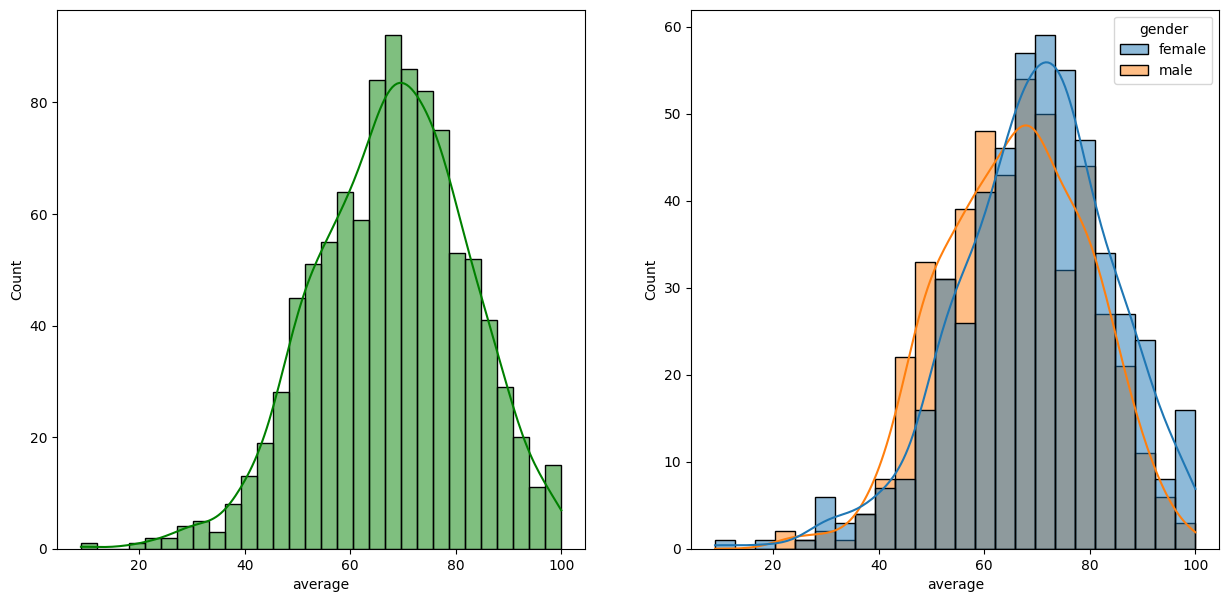

In [58]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

### Insights

Female students perform better than male students